In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys 

if os.name == 'nt':
    path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Waves\\bitbucket\\github\\codes'
else:
    path = '/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes'
    
sys.path.append(path)

from waves.tools.dsp import *
from thinkx import thinkdsp

### 1. 
-45 -135

In [3]:
np.rad2deg(np.angle(1-1j)), np.rad2deg(np.angle(-1-1j))

(-45.0, -135.0)

### 2.
-1

In [4]:
N = 64
np.exp(-1j * 2 * np.pi / N * N / 2 )

(-1-1.2246467991473532e-16j)

### 3.
1 2 3 4 5

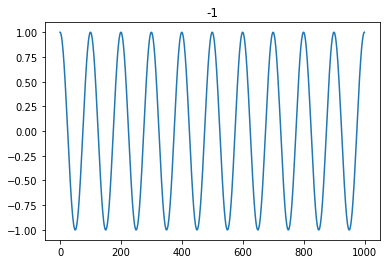

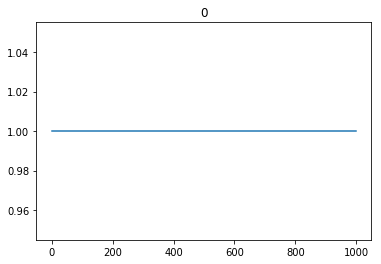

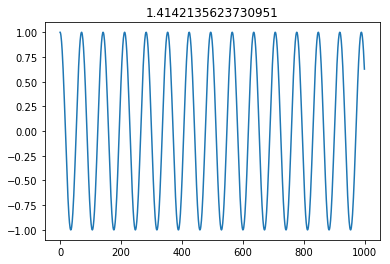

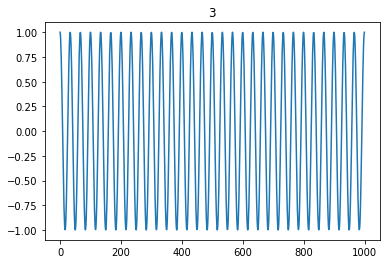

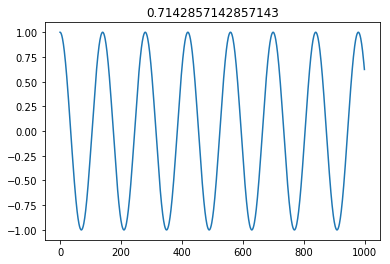

In [5]:
fs = [-1, 0, np.sqrt(2), 3, 5/7]
t = np.linspace(0, 10, 1000)

for f in fs:
    plt.plot(np.cos(2*np.pi*f*t))
    plt.title(f)
    plt.show()

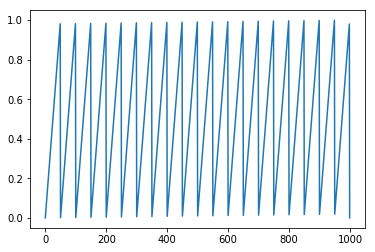

In [6]:
t = np.linspace(-10, 10, 1000)

plt.plot(t - np.floor(t));

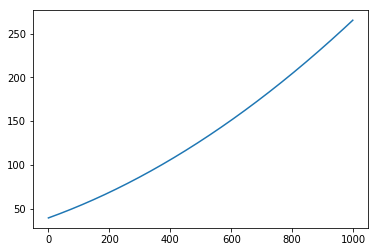

In [7]:
t = np.linspace(0, 10, 1000)

plt.plot((t + 2*np.pi)**2)

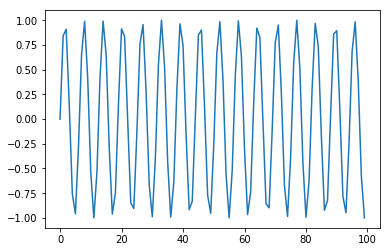

In [8]:
n = np.arange(100)

plt.plot(np.sin(n));

/home/wei/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


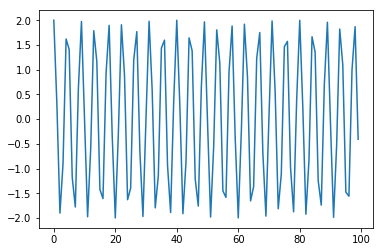

In [9]:
n = np.arange(100)
f = np.sqrt(2)

plt.plot(n, np.exp(-1j*f*n) + np.exp(1j*f*n));

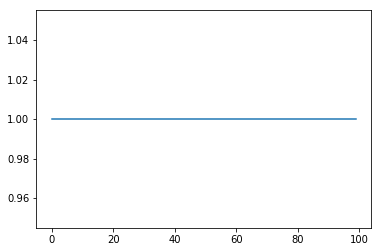

In [10]:
n = np.arange(100)

plt.plot(np.ones(n.shape));

### 4.
1 2 3

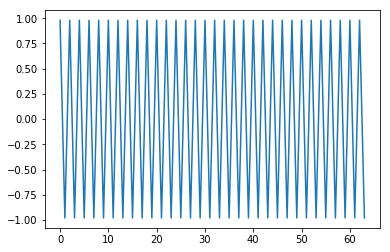

In [11]:
N = 64
L = N / 2

n = np.arange(64)
phi = 0.2

x = np.cos(2*np.pi/N*L*n + phi)
plt.plot(n, x);

In [12]:
k = L
Wk = np.exp(-1j*2*np.pi/N*n*k)
Xk = np.sum(x * Wk)
Xk

(62.72426098183956+2.663407276975461e-13j)

$X[k] = Ne^{j\phi}$ for k = L

### 5.
The orthogonality of the vectors depends on the length NN of the elements of the basis.

In [13]:
N

64

In [14]:
def get_coeffs(N):
    
    k = np.arange(N)
    
    coeffs = []
    
    for i in k:
        for j in k:
            Wk1 = np.exp(-1j*2*np.pi/N*n*i)
            Wk2 = np.exp(-1j*2*np.pi/N*n*j)
            coeff = int(np.dot(Wk1, Wk2))

            if coeff != 0:
                coeffs.append((i, j, coeff))
                
    return coeffs

In [15]:
get_coeffs(64)[:10]

/home/wei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


[(0, 0, 64),
 (1, 63, 64),
 (2, 62, 63),
 (3, 61, 64),
 (4, 60, 64),
 (5, 59, 64),
 (6, 58, 63),
 (7, 57, 64),
 (8, 56, 64),
 (9, 55, 64)]

In [16]:
get_coeffs(63)[:10]

/home/wei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


[(0, 0, 64),
 (0, 1, 1),
 (0, 2, 1),
 (0, 3, 1),
 (0, 4, 1),
 (0, 5, 1),
 (0, 8, 1),
 (0, 10, 1),
 (0, 11, 1),
 (0, 15, 1)]

### 6. 
1

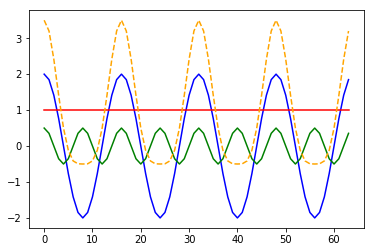

In [17]:
N = 64
n = np.arange(N)
ks = np.arange(N)

y1 = np.cos(np.pi*2 / N * n * 4) * 2
y2 = np.cos(np.pi*2 / N * n * 8) * 0.5
y3 = np.cos(np.pi*2 / N * n * 0) * 1
x = y1 + y2 + y3

plt.plot(n, y1, color = 'b')
plt.plot(n, y2, color = 'g')
plt.plot(n, y3, color = 'r')
plt.plot(n, x,  color = 'orange', linestyle = '--');

In [18]:
coeffs = []

for k in ks:
    Wk = np.exp(-1j*2*np.pi/N*n*k) 
    coeff = round(np.dot(x, Wk))
    if coeff != 0:
        coeffs.append((k, coeff))
        
for coeff in coeffs:
    print(coeff)

(0, (64+0j))
(4, (64-0j))
(8, (16-0j))
(56, (16+0j))
(60, (64+0j))


In [19]:
np.linalg.norm(x)**2

199.99999999999997

In [20]:
(x**2).sum()

199.99999999999994

In [21]:
sum_coeff = np.sum([coeff[1]**2 for coeff in coeffs])
sum_coeff

(12800+0j)

In [22]:
sum_coeff / (x**2).sum()

(64.00000000000003+0j)

In [23]:
# Y3
k = 0
Wk = np.exp(-1j*2*np.pi/N*n*k)
coeff = round(np.dot(x, Wk))
coeff

(64+0j)

In [24]:
# Y1
k = 4
Wk = np.exp(-1j*2*np.pi/N*n*k)
coeff = round(np.dot(x, Wk))
coeff

(64-0j)

In [25]:
# Y2
k = 8
Wk = np.exp(-1j*2*np.pi/N*n*k)
coeff = round(np.dot(x, Wk))
coeff

(16-0j)

### 7.
1, 3

In [26]:
N = 64
n = np.arange(N)
ks = np.arange(N)
del L

In [27]:
M = N

In [28]:
L = np.arange(N)

coeffs = []

for k in ks:
    for l in L:
        x = np.cos(2*np.pi*l/M*n)
        Wk = np.exp(-1j*2*np.pi/N*n*k) 
        coeff = round(np.dot(x, Wk))
        
        if coeff != 0:
            coeffs.append((l, k, coeff))
        
for coeff in coeffs[:10]:
    print(coeff)

(0, 0, (64+0j))
(1, 1, (32-0j))
(63, 1, (32-0j))
(2, 2, (32-0j))
(62, 2, (32+0j))
(3, 3, (32+0j))
(61, 3, (32+0j))
(4, 4, (32-0j))
(60, 4, (32+0j))
(5, 5, (32-0j))


In [29]:
y1 = np.cos(np.pi*2 / N * n * 4) * 2
y2 = np.cos(np.pi*2 / N * n * 8) * 0.5
y3 = np.cos(np.pi*2 / N * n * 0) * 1

x = y1 + y2 + y3
y = np.roll(x, int(N/10))

coeffs = []

for k in ks:     
    Wk = np.exp(-1j*2*np.pi/N*n*k) 
    coeff_x = round(np.dot(x, Wk))
    coeff_y = round(np.dot(y, Wk))

    if coeff_x != coeff_y:
        coeffs.append((k, coeff_x, coeff_y))
        
for coeff in coeffs[:10]:
    print(coeff)

(4, (64-0j), (-45-45j))
(8, (16-0j), (-0+16j))
(56, (16+0j), -16j)
(60, (64+0j), (-45+45j))


### 8.
1 4

In [30]:
N = 4

phis = np.identity(N)
# phis /= np.linalg.norm(phis)
phis

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [31]:
norm2 = np.linalg.norm(phis)
norm2

2.0

In [32]:
norm2_square = norm2**2
norm2_square

4.0

In [33]:
(phis**2).sum()

4.0

In [34]:
x = np.random.randn(N)

In [35]:
(x**2).sum()

3.8215826161882966

In [36]:
sum_value = 0

for i in range(N):
    sum_value += (np.dot(phis[i], x)**2)
    
sum_value

3.8215826161882966

In [37]:
sum_value = 0

for i in range(N):
    sum_value += (np.dot(phis[i] * 2, x)**2)
    
sum_value

15.286330464753187

In [38]:
P = sum_value / (x**2).sum()
P

4.0

In [39]:
P == norm2_square

True

In [40]:
P == norm2

False

In [41]:
a = np.array((2, 4))
b = np.array((2, 4))
a, b

(array([2, 4]), array([2, 4]))

In [42]:
np.dot(a/2, b)

10.0

### 9.

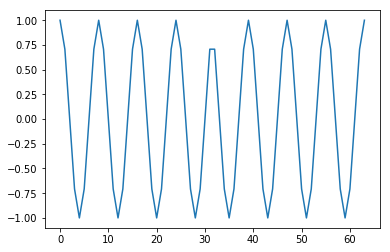

In [43]:
N = 64
n = np.arange(N)
n1 = n[:int(N/2)]
n2 = np.flip(n1)
k = 8
x1 = np.cos(2*np.pi/N*n1*k)
x2 = np.cos(2*np.pi/N*n2*k)
x = np.hstack((x1, x2))
plt.plot(n, x);

In [44]:
sp = np.fft.fft(x)

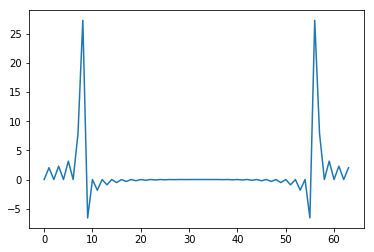

In [45]:
plt.plot(np.real(sp));

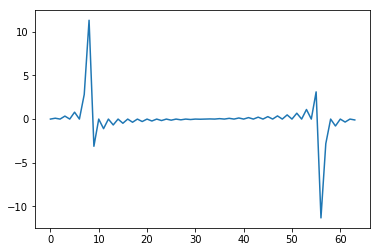

In [46]:
plt.plot(np.imag(sp));

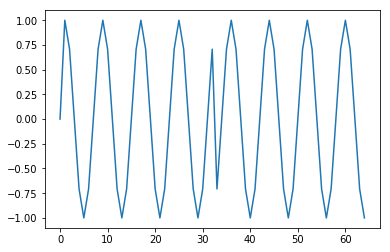

In [47]:
N = 64
n = np.arange(N)
n1 = n[:int(N/2)]
n2 = np.flip(n1)
k = 8
x1 = np.cos(2*np.pi/N*n1*k)
x2 =- np.cos(2*np.pi/N*n2*k)
x = np.hstack(([0], x1, x2))
plt.plot(x);

In [48]:
sp = np.fft.fft(x)

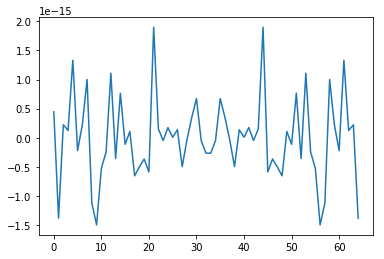

In [49]:
plt.plot(np.real(sp));

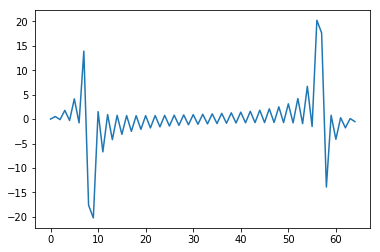

In [50]:
plt.plot(np.imag(sp));